In [365]:
#Import necessary libraries for data analysis and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [366]:
#Load the dataset from a CSV file and configure display settings for Pandas.
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Billionaires Statistics Dataset.csv')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 35)
#Display the first few rows of the dataset to get an overview.
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [367]:
#Check the information about the dataset, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [368]:
#Get basic statistics of the dataset, including count, mean, min, max, etc
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [369]:
#Check for missing values in the dataset.
df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [370]:
#Check data types of each column in the dataset.
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

In [371]:
#Fill missing values in the 'age' column with the mean age.
df.fillna(df['age'].mean(), inplace=True)

In [372]:
df['age'].describe()

count    2640.000000
mean       65.140194
std        13.093803
min        18.000000
25%        56.000000
50%        65.140194
75%        74.000000
max       101.000000
Name: age, dtype: float64

In [373]:
df['age'].value_counts().sort_index()

18.0     1
19.0     1
20.0     1
21.0     2
26.0     2
        ..
96.0     3
97.0     4
98.0     2
99.0     4
101.0    1
Name: age, Length: 80, dtype: int64

In [374]:
#Explore the age distribution of billionaires and create a trendline plot.
age_counts = df['age'].value_counts().sort_index()
x = age_counts.index
y = age_counts.values
print(x, y)

Float64Index([             18.0,              19.0,              20.0,
                           21.0,              26.0,              27.0,
                           28.0,              29.0,              30.0,
                           31.0,              32.0,              33.0,
                           34.0,              35.0,              36.0,
                           37.0,              38.0,              39.0,
                           40.0,              41.0,              42.0,
                           43.0,              44.0,              45.0,
                           46.0,              47.0,              48.0,
                           49.0,              50.0,              51.0,
                           52.0,              53.0,              54.0,
                           55.0,              56.0,              57.0,
                           58.0,              59.0,              60.0,
                           61.0,              62.0,              63.0,
      

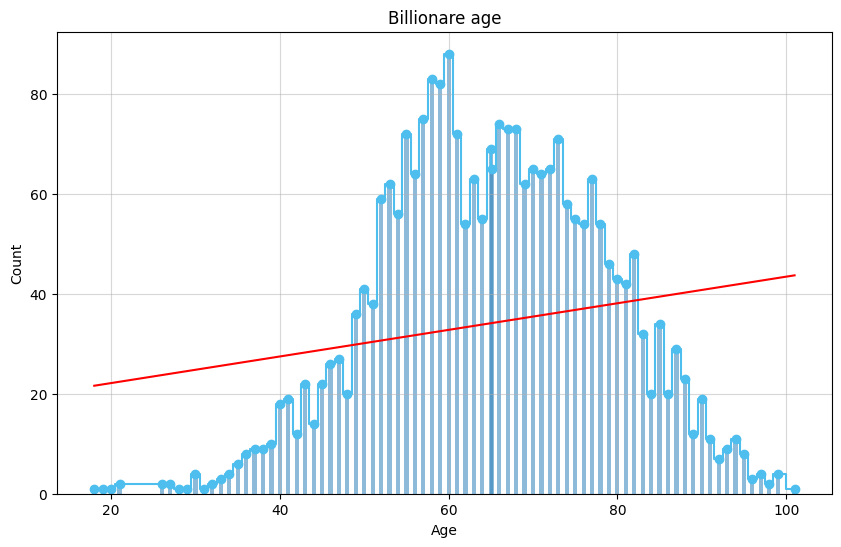

In [375]:
# Calculate the coefficients of a linear trendline (line of best fit) for age and count data points.
coefficients = np.polyfit(x, y, 1)

# Compute the trendline values based on the coefficients. This line will represent the trend in the age distribution.
trendline = coefficients[0] * x + coefficients[1]

# Create a new figure for plotting with a specific size.
plt.figure(figsize=(10, 6))

# Create a bar chart that shows the count of billionaires at different age values. These bars represent the distribution of billionaires' ages.
plt.bar(age_counts.index, age_counts.values, width=0.5, align='center', alpha=0.5)

# Create a step plot to visualize the count of billionaires with age. The 'where' argument indicates that the line passes through the middle of each bar, and 'o' markers are added to the data points.
plt.step(age_counts.index, age_counts.values, where='mid', marker='o', linestyle='-', color='#4DBEEE', label='Age trend line')

# Plot the linear trendline as a red line on the same chart. This line represents the overall trend in the data.
plt.plot(x, trendline, color='red', linestyle='-',label='Trend line')

# Add labels and a title to the chart to provide context and information about what is being visualized.
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Billionare age')

# Display a grid on the chart for better readability. The grid lines are semi-transparent (alpha=0.5) and are drawn on both axes.
plt.grid(True, alpha=0.5, which='both')

# Finally, display the chart with the age distribution and trendline.
plt.show()

In [376]:
#Perform industry-wise analysis of billionaire wealth and create a bar chart.
industries_stats = df.groupby('industries')['finalWorth'].describe()
industries_stats

,count,mean,std,min,25%,50%,75%,max
industries,,,,,,,,
Automotive,73.0,7195.890411,21467.025349,1000.0,1500.0,2600.0,4000.0,180000.0
Construction & Engineering,45.0,2633.333333,2176.423254,1000.0,1400.0,2100.0,2700.0,13700.0
Diversified,187.0,4840.641711,9722.922456,1000.0,1500.0,2300.0,3950.0,83400.0
Energy,100.0,4535.000000,4801.038924,1000.0,1600.0,2450.0,6300.0,25500.0
Fashion & Retail,266.0,6386.466165,16384.139970,1000.0,1600.0,2500.0,4800.0,211000.0
Finance & Investments,372.0,4314.784946,6927.454012,1000.0,1500.0,2600.0,4625.0,106000.0
Food & Beverage,212.0,4515.094340,7158.149731,1000.0,1500.0,2500.0,4300.0,68000.0
Gambling & Casinos,25.0,4820.000000,6943.462153,1000.0,1500.0,2800.0,5200.0,35000.0
Healthcare,201.0,3200.000000,3274.385439,1000.0,1300.0,2100.0,3500.0,22600.0


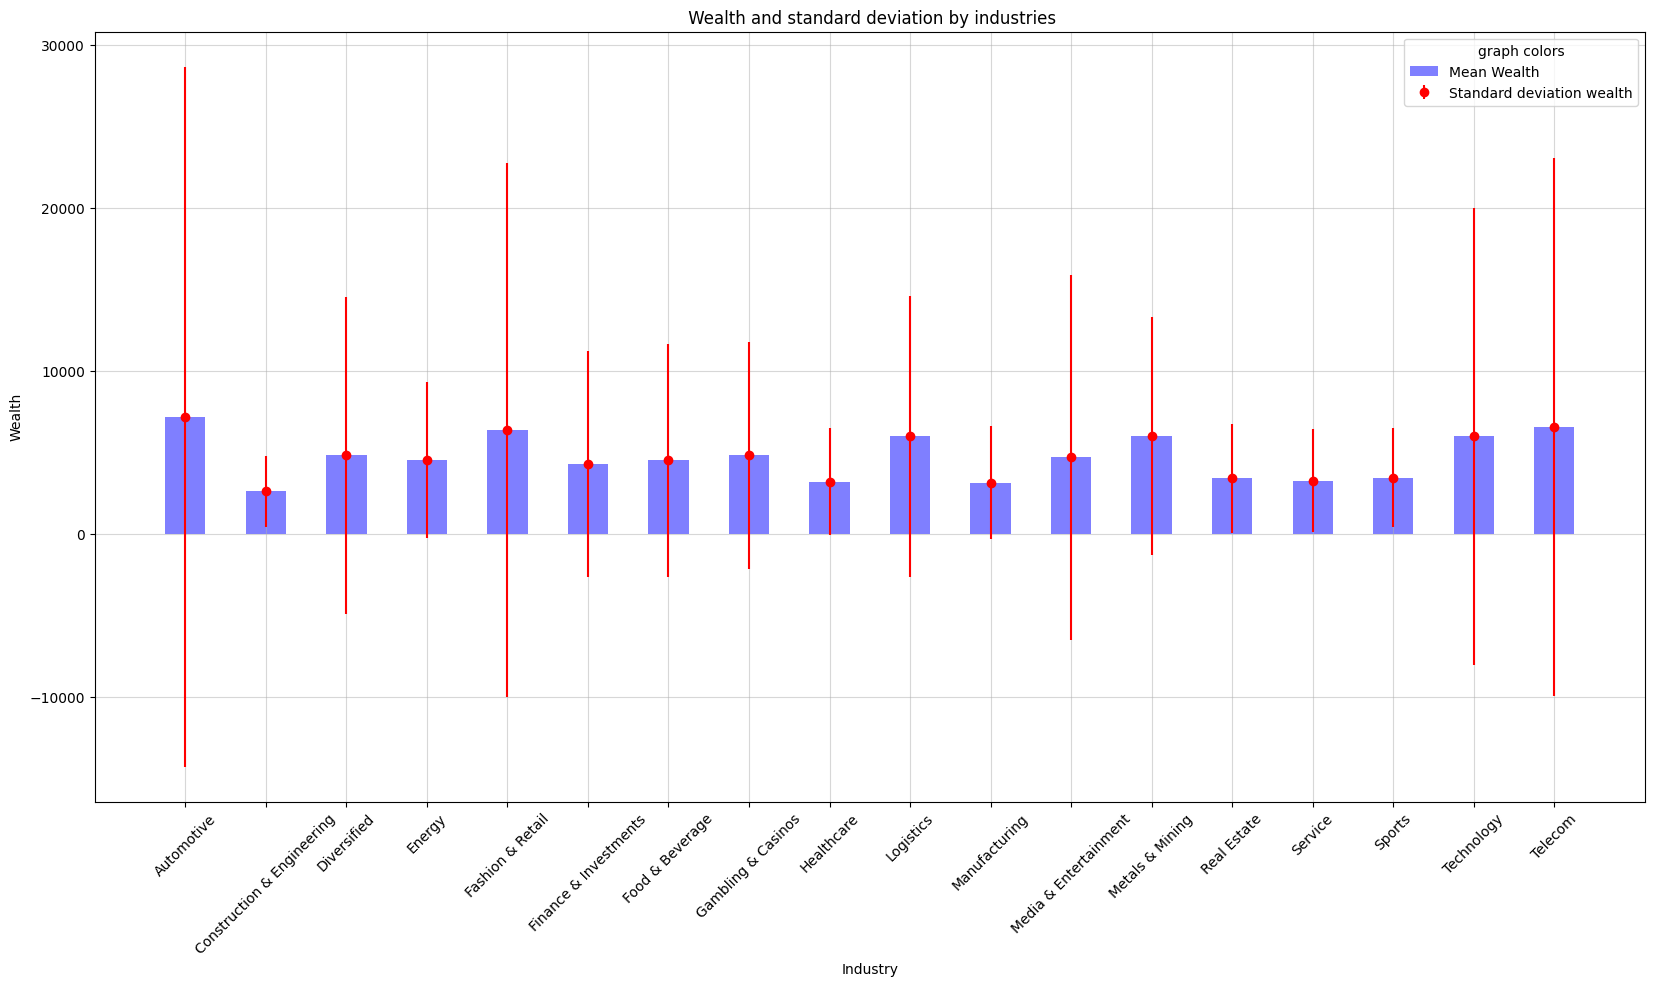

In [377]:
plt.figure(figsize=(20, 10))
# Create a bar chart to visualize the mean wealth of different industries.
plt.bar(industries_stats.index, industries_stats['mean'], width=0.5, align='center', alpha=0.5, color='#0000FF', label='Mean Wealth')

# Add error bars to show the standard deviation of wealth for each industry using 'o' markers. The bars are colored in red.
plt.errorbar(industries_stats.index, industries_stats['mean'], industries_stats['std'], fmt='o', color='red', label='Standard deviation wealth')

# Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Wealth')
plt.title(' Wealth and standard deviation by industries')

# Add a legend to the chart to identify the colors and their corresponding meanings.
plt.legend(title='graph colors')
plt.grid(True, alpha=0.5, which='both')
plt.show()

In [378]:
#Select and visualize the mean wealth of the 'Automotive' industry.
industries_stats[industries_stats.index == 'Automotive']['mean']

industries
Automotive    7195.890411
Name: mean, dtype: float64

In [379]:
#Drop rows with missing values in the 'country' column.
df.dropna(subset=['country'], axis=0, inplace=True)

In [380]:
df['country'].isnull().sum()

0

In [381]:
#Perform country-wise analysis of billionaire wealth and create a bar chart for the top 20 countries.
country_stats = df.groupby('country',)['finalWorth'].describe()
country_stats

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
65.14019417475728,38.0,2418.421053,2475.267418,1000.0,1300.0,1750.0,2675.0,15800.0
Algeria,1.0,4600.000000,NaN,4600.0,4600.0,4600.0,4600.0,4600.0
Andorra,1.0,1500.000000,NaN,1500.0,1500.0,1500.0,1500.0,1500.0
Argentina,4.0,2750.000000,1577.973384,1300.0,1750.0,2400.0,3400.0,4900.0
Armenia,1.0,1200.000000,NaN,1200.0,1200.0,1200.0,1200.0,1200.0
...,...,...,...,...,...,...,...,...
United Kingdom,82.0,4520.731707,5180.036174,1000.0,1425.0,2600.0,6300.0,32100.0
United States,754.0,6067.771883,13355.875045,1000.0,1800.0,2900.0,5300.0,180000.0
Uruguay,1.0,1800.000000,NaN,1800.0,1800.0,1800.0,1800.0,1800.0


In [382]:
country_stats.index

Index([         65.14019417475728,                  'Algeria',
                        'Andorra',                'Argentina',
                        'Armenia',                'Australia',
                        'Austria',                  'Bahamas',
                        'Bahrain',                  'Belgium',
                        'Bermuda',                   'Brazil',
         'British Virgin Islands',                 'Cambodia',
                         'Canada',           'Cayman Islands',
                          'Chile',                    'China',
                       'Colombia',                   'Cyprus',
                 'Czech Republic',                  'Denmark',
                          'Egypt',     'Eswatini (Swaziland)',
                        'Finland',                   'France',
                        'Georgia',                  'Germany',
                         'Greece',                 'Guernsey',
                      'Hong Kong',                  'Hu

In [383]:
df['country'].info

<bound method Series.info of 0              France
1       United States
2       United States
3       United States
4       United States
            ...      
2635            China
2636    United States
2637            China
2638            China
2639      Philippines
Name: country, Length: 2640, dtype: object>

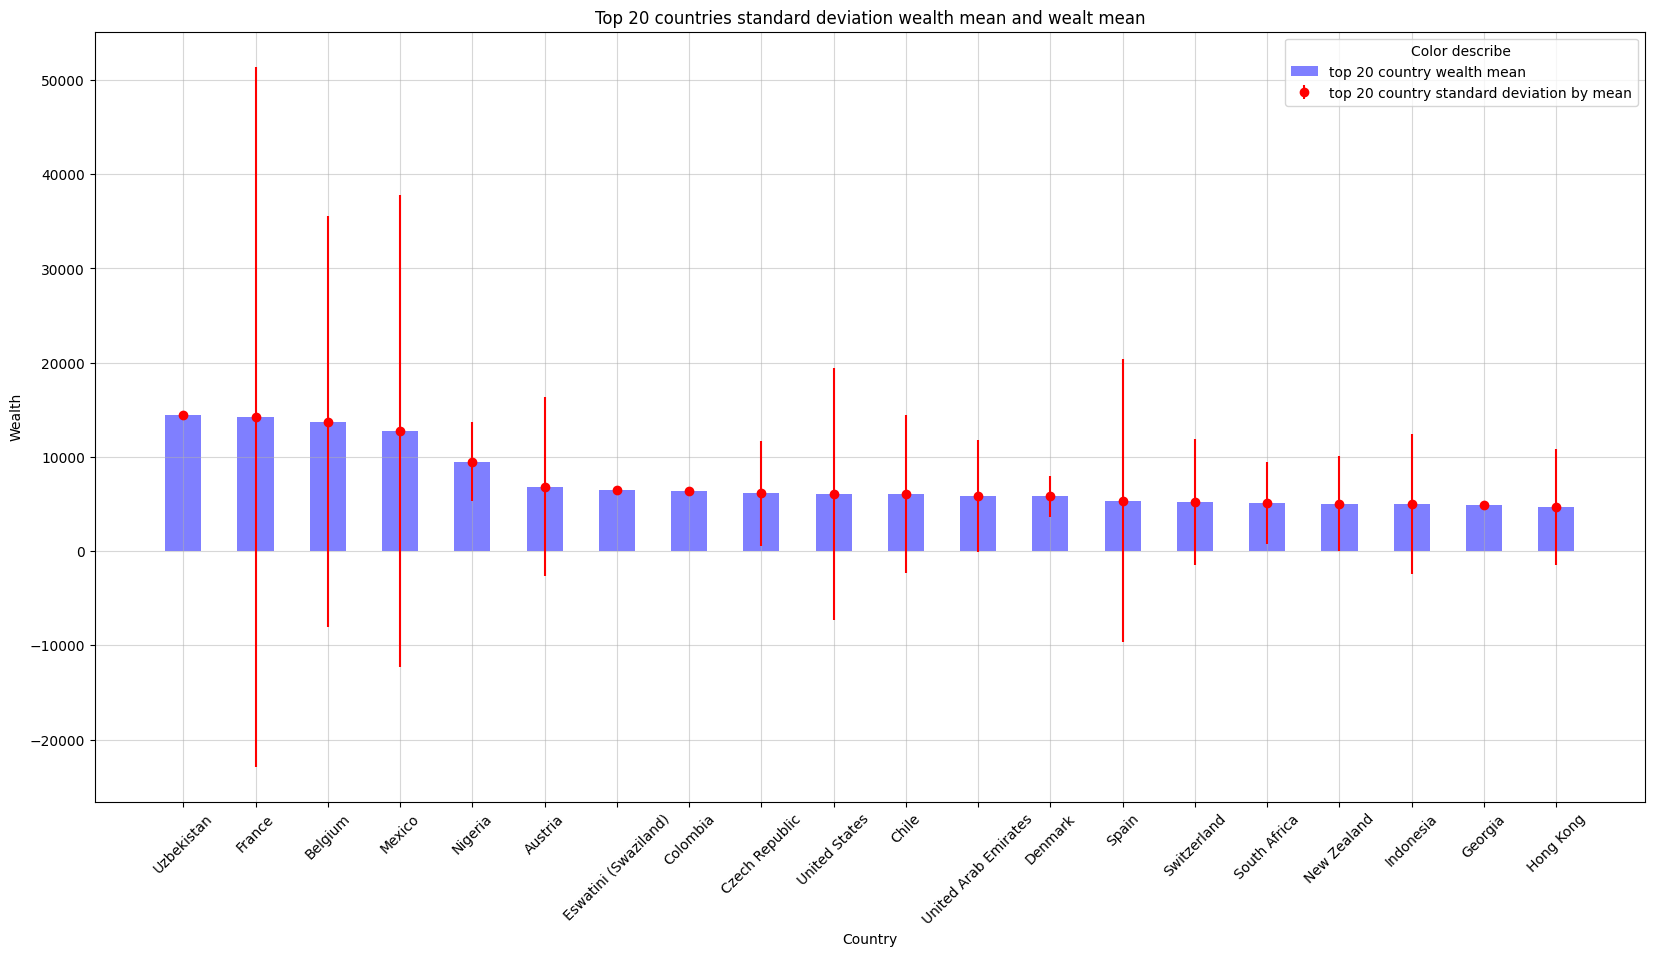

In [384]:
# Filter the top 20 countries based on the mean wealth from the 'country_stats' DataFrame.
filtered_country_stats_top20 = country_stats.nlargest(20, 'mean')
plt.figure(figsize=(20, 10))
plt.bar(filtered_country_stats_top20.index, filtered_country_stats_top20['mean'], width=0.5, align='center', alpha=0.5, color='#0000FF', label='top 20 country wealth mean')
plt.errorbar(filtered_country_stats_top20.index, filtered_country_stats_top20['mean'], filtered_country_stats_top20['std'], fmt='o', color='red', label='top 20 country standard deviation by mean')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Wealth')
plt.title('Top 20 countries standard deviation wealth mean and wealt mean')
plt.grid(True, alpha=0.5, which='both')
plt.legend(title='Color describe')
plt.show()

In [385]:
df['residenceStateRegion'] = df['residenceStateRegion'].astype(str)

In [386]:
count = df['residenceStateRegion'].value_counts()['65.14019417475728']
print(count)

1893


In [387]:
#Analyze wealth by residence state/region and create a bar chart.
region_stats = df.groupby('residenceStateRegion')['finalWorth'].describe()
region_stats

,count,mean,std,min,25%,50%,75%,max
residenceStateRegion,,,,,,,,
65.14019417475728,1893.0,4042.842050,7922.008026,1000.0,1400.0,2100.0,3700.0,211000.0
Midwest,67.0,6886.567164,14519.421638,1000.0,1950.0,3800.0,5350.0,106000.0
Northeast,190.0,5393.157895,9301.641519,1000.0,1800.0,2900.0,5275.0,94500.0
South,241.0,6142.738589,13975.256377,1000.0,1800.0,3100.0,5500.0,180000.0
U.S. Territories,1.0,3000.000000,NaN,3000.0,3000.0,3000.0,3000.0,3000.0
West,248.0,6387.903226,15180.477516,1000.0,1600.0,2500.0,4900.0,114000.0


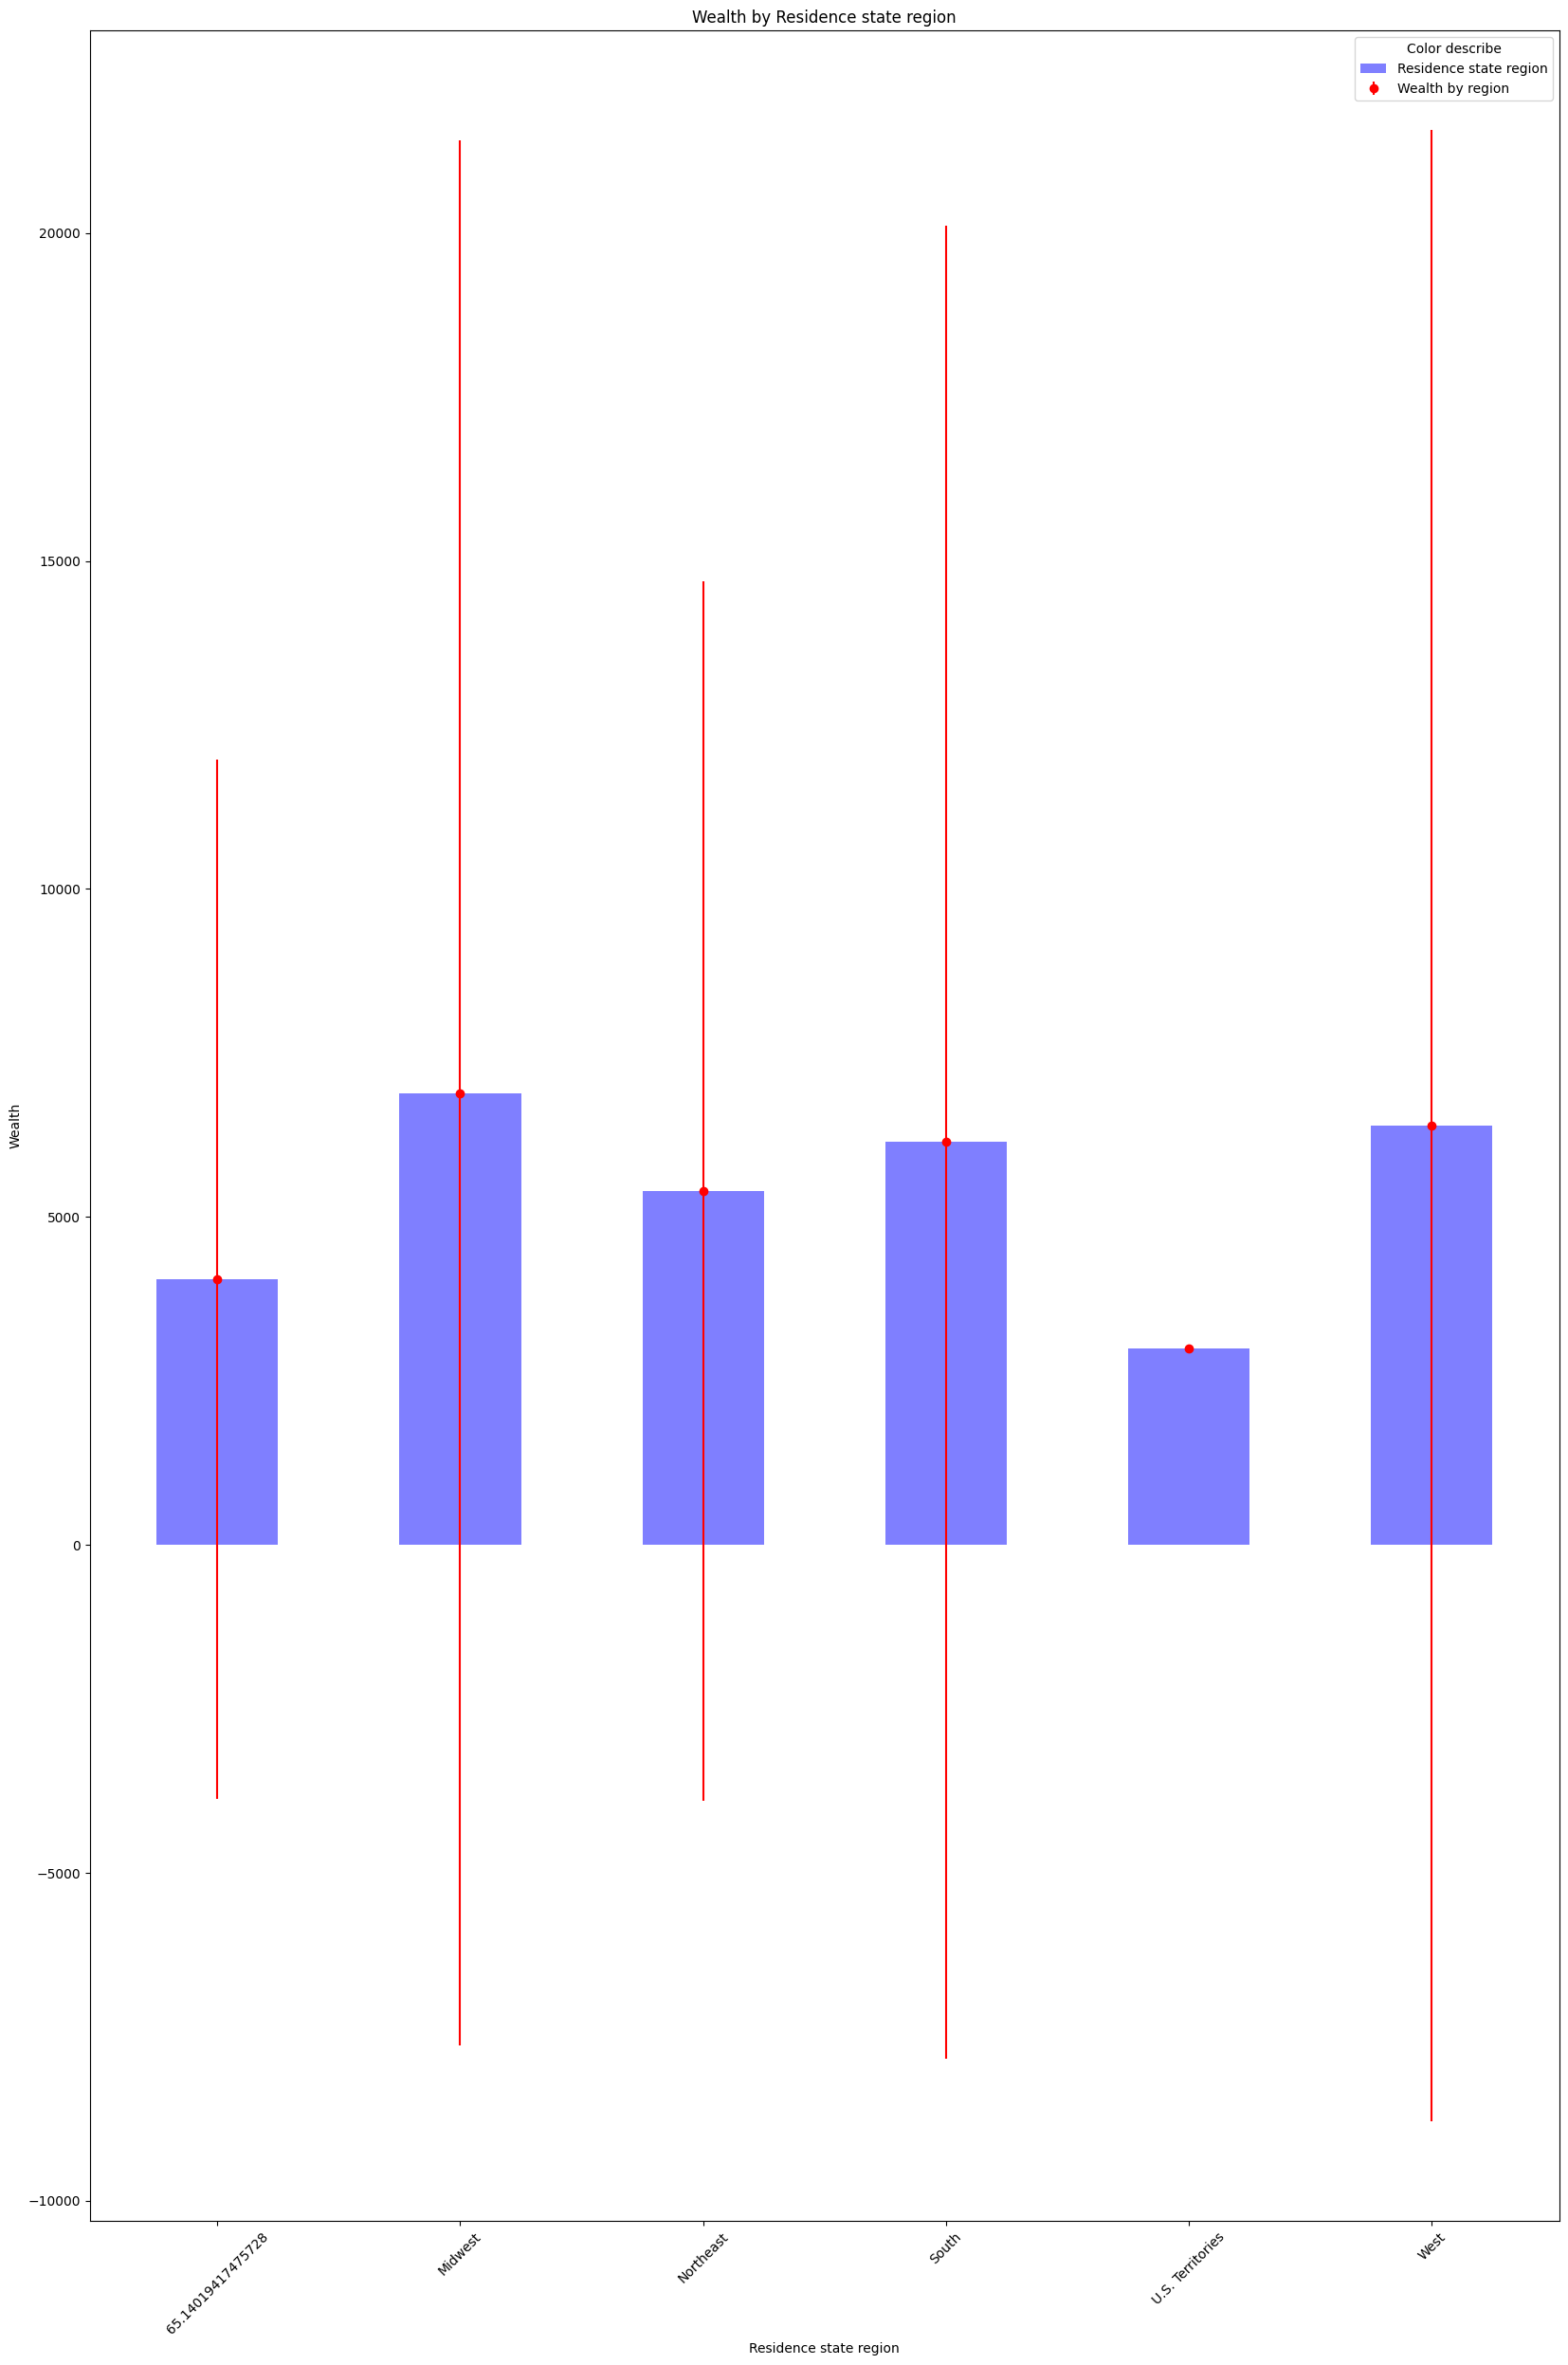

In [388]:
plt.figure(figsize=(20, 30))
plt.bar(region_stats.index, region_stats['mean'], width=0.5, align='center', alpha=0.5, color='#0000FF', label='Residence state region')
plt.errorbar(region_stats.index, region_stats['mean'], region_stats['std'],  fmt='o', color='red', label='Wealth by region')
plt.xticks(rotation=45)
plt.xlabel('Residence state region')
plt.ylabel('Wealth')
plt.title('Wealth by Residence state region')
plt.legend(title='Color describe')
plt.show()

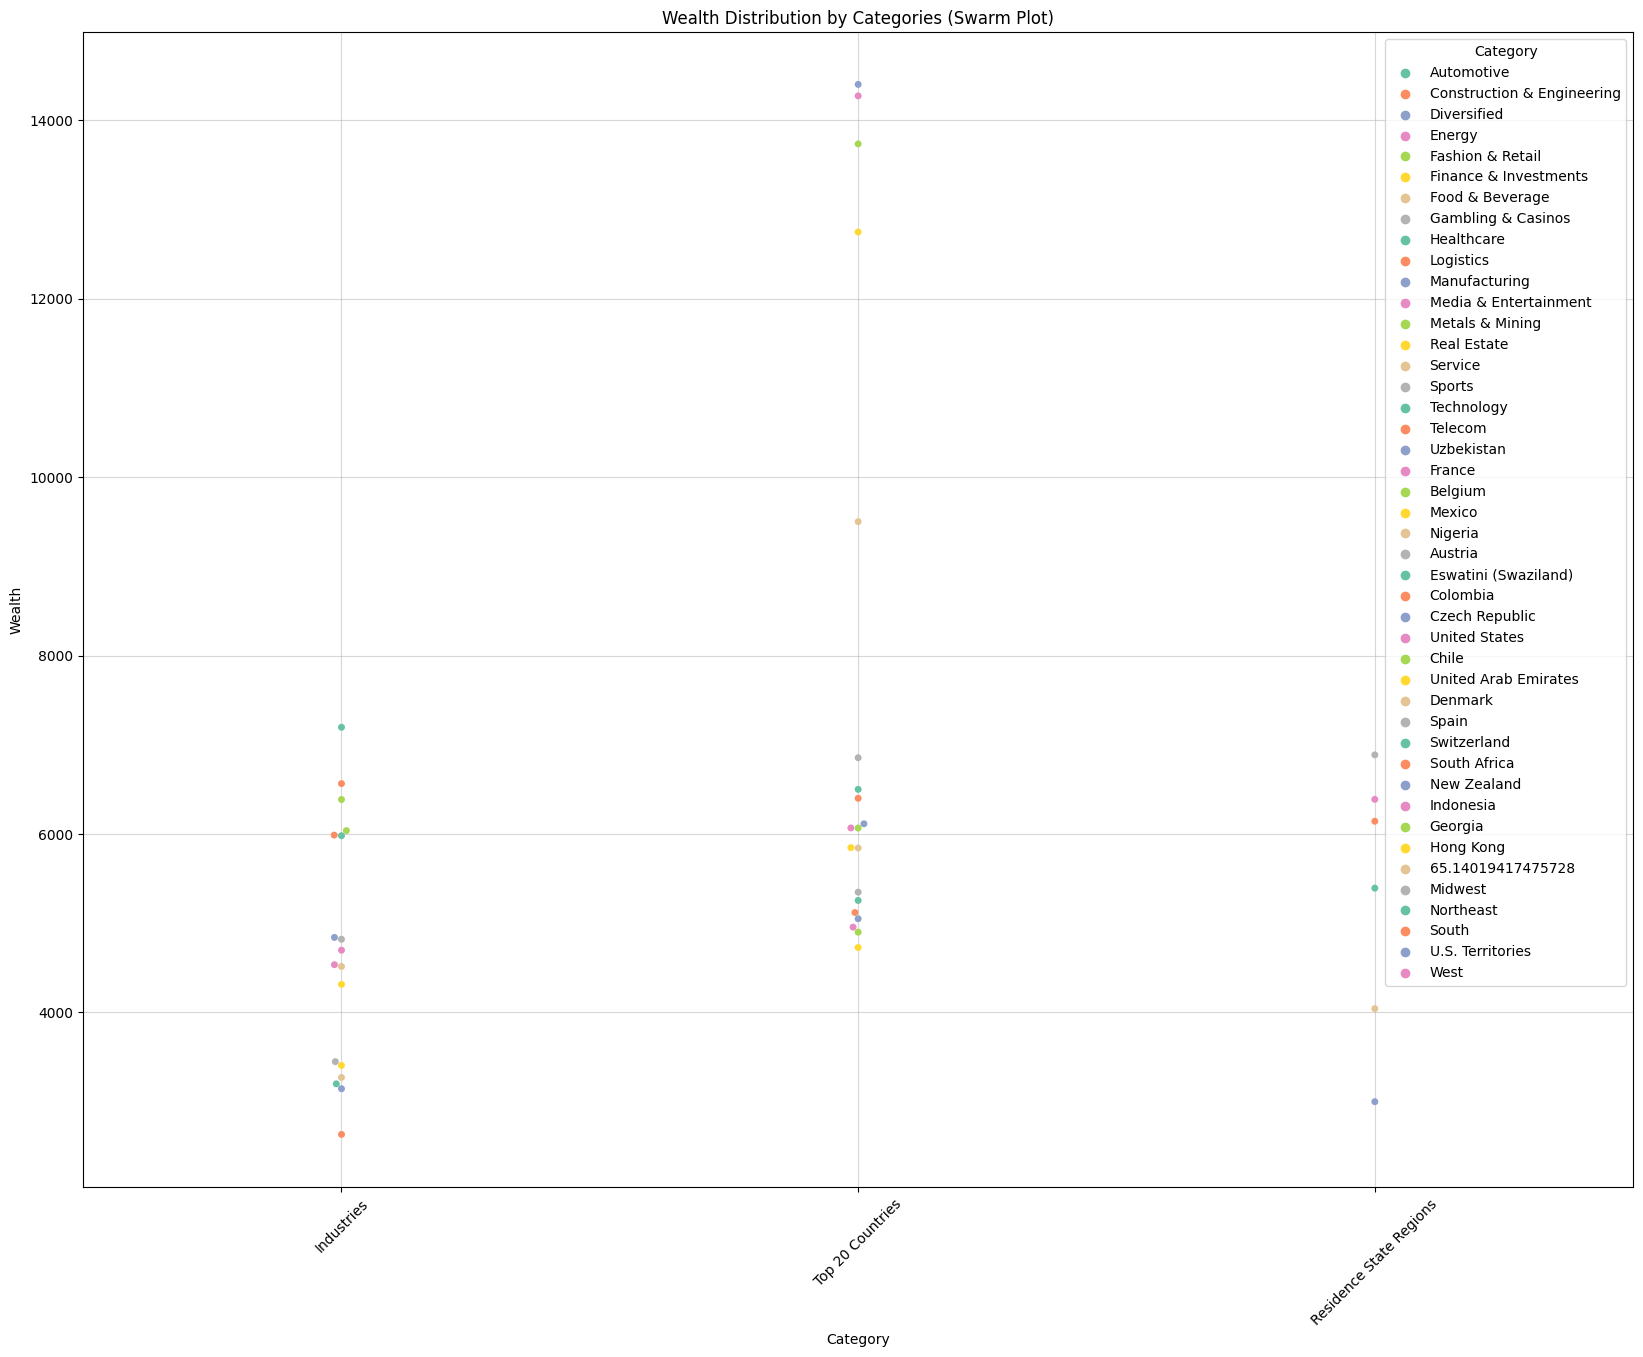

In [389]:
# Combine data from the three categories (industries, top 20 countries, and residence state regions)
# and create a swarm plot to visualize wealth distribution by category.
combined_data = pd.concat([industries_stats, filtered_country_stats_top20, region_stats], keys=['Industries', 'Top 20 Countries', 'Residence State Regions'])

# Reset the index for easier plotting
combined_data = combined_data.reset_index()

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a grouped swarm plot
sns.swarmplot(x='level_0', y='mean', data=combined_data, hue='level_1', palette='Set2')

# Customize the chart
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Wealth')
plt.title('Wealth Distribution by Categories (Swarm Plot)')
plt.legend(title='Category')

# Display the chart
plt.grid(True, alpha=0.5, which='both')
plt.show()



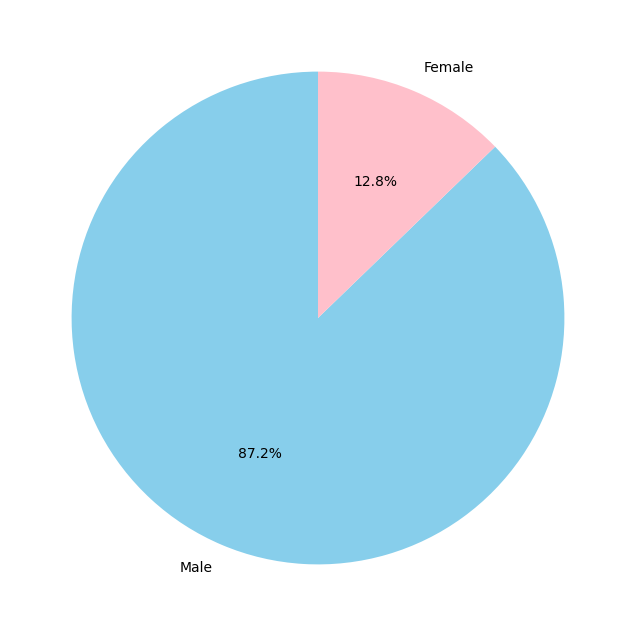

In [390]:
#Visualize the gender distribution of billionaires using a pie chart.
gender_counts = df['gender'].value_counts()

labels = ['Male', 'Female']
colors = ['skyblue', 'pink']

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

In [391]:
#Filter and visualize the status distribution of billionaires using a pie chart.
status_to_remove = ['E', 'N', 'Split Family Fortune', 'R']

filtered_df = df[~df['status'].isin(status_to_remove)]
filtered_status = filtered_df['status'].value_counts()
filtered_status

D    1223
U     855
Name: status, dtype: int64

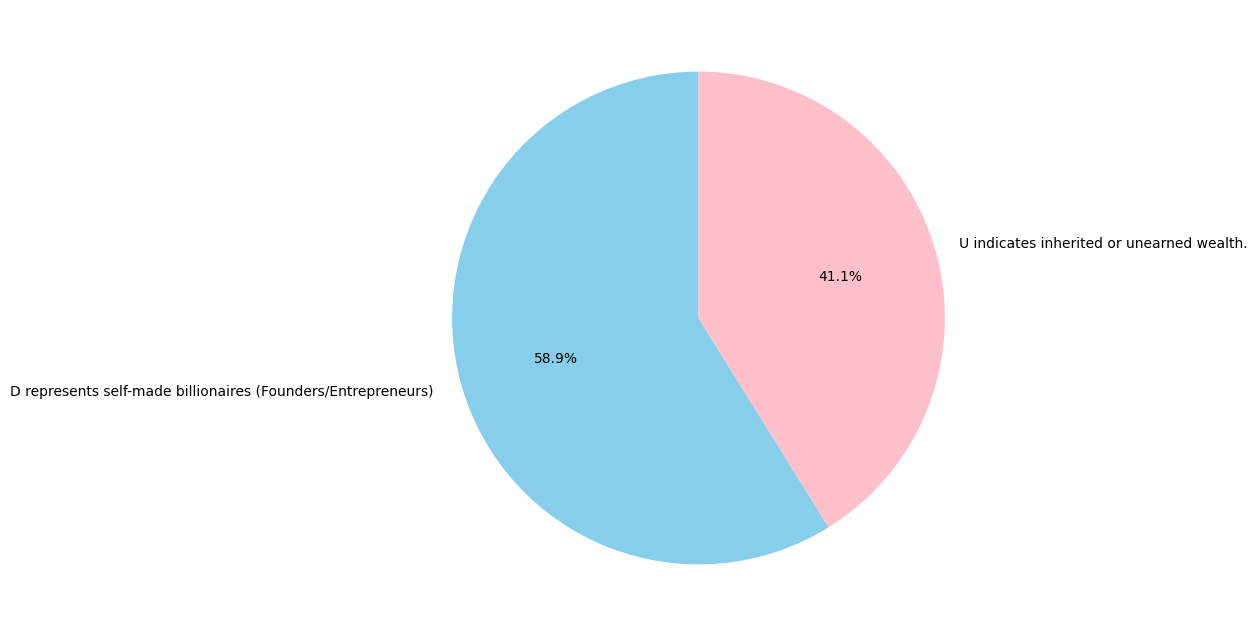

In [392]:
labels = ['D represents self-made billionaires (Founders/Entrepreneurs) ', 'U indicates inherited or unearned wealth.']
colors = ['skyblue', 'pink']
sizes = filtered_status.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

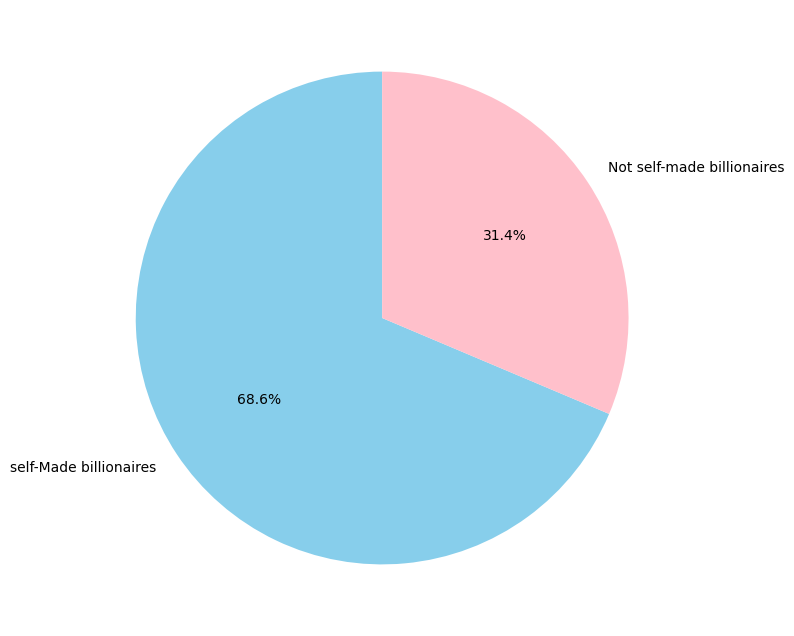

In [393]:
#Visualize the distribution of self-made billionaires using a pie chart.
self_made_stats = df['selfMade'].value_counts()
labels = ['self-Made billionaires', 'Not self-made billionaires']
colors = ['skyblue', 'pink']
plt.figure(figsize=(8, 8))
plt.pie(self_made_stats, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()

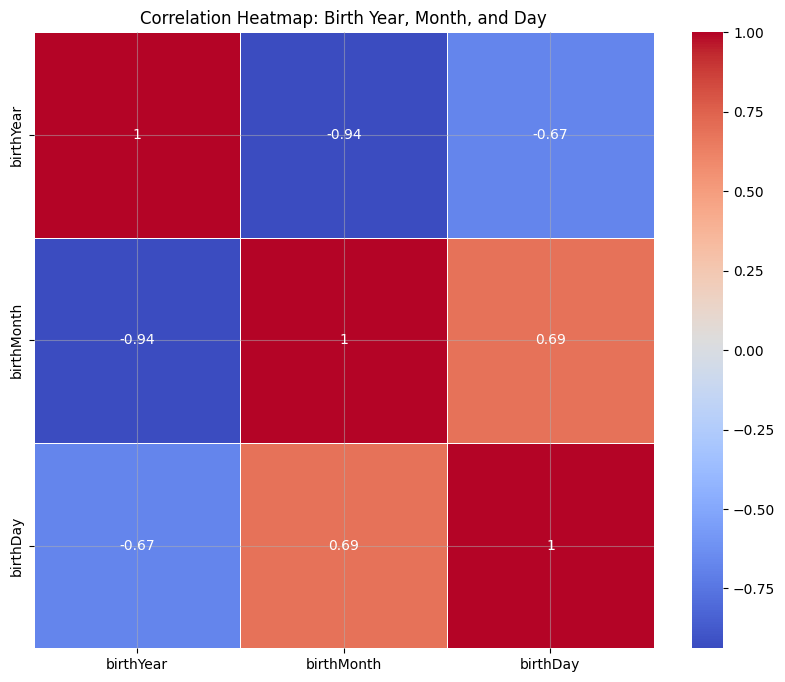

In [394]:
#Create a heatmap to visualize correlations between birth year, month, and day.
birth_data = df[['birthYear', 'birthMonth', 'birthDay']]
correlation_matrix = birth_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Birth Year, Month, and Day')
plt.grid(True, alpha=0.5)
plt.show()

In [395]:
economic_indicator = df.groupby(['cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment',
                                 'gross_primary_education_enrollment_country', 'life_expectancy_country',
                                 'tax_revenue_country_country', 'total_tax_rate_country']).describe()
economic_indicator

rank  \
                                                                                                                                                                                                            count   
cpi_country cpi_change_country gdp_country       gross_tertiary_education_enrollment gross_primary_education_enrollment_country life_expectancy_country tax_revenue_country_country total_tax_rate_country          
65.140194   65.140194          65.14019417475728 65.140194                           65.140194                                  65.140194               65.140194                   65.140194               164.0   
                               $3,154,057,987    65.140194                           106.400000                                 65.140194               65.140194                   65.140194                 1.0   
                               $57,921,286,440   10.100000                           104.200000                                 71.600000               14.800000                   31.600000                 1.0   
                               $6,552,858,739    35.600000                           104.700000                                 83.000000               65.140194                   21.600000                 1.0   
                               $7,184,844,193    65.140194                           65.140194                                  65.140194               65.140194                   65.140194                17.0   
...                                                                                                                                                                                                           ...   
232.750000  53.500000          $449,663,446,954  90.000000                           109.700000                                 76.500000               10.100000                   106.300000                4.0   
234.440000  15.200000          $754,411,708,203  23.900000                           93.200000                                  77.400000               17.900000                   42.300000                25.0   
267.510000  11.400000          $448,120,428,859  10.200000                           84.700000                                  54.300000               1.500000                    34.800000                 3.0   
281.660000  7.900000           $153,781,069,118  82.700000                           99.000000                                  71.600000               20.100000                   45.200000                 6.0   
288.570000  9.200000           $303,175,127,598  35.200000                           106.300000                                 71.800000               12.500000                   44.400000                 4.0   

                                                                                                                                                                                                                         \
                                                                                                                                                                                                                   mean   
cpi_country cpi_change_country gdp_country       gross_tertiary_education_enrollment gross_primary_education_enrollment_country life_expectancy_country tax_revenue_country_country total_tax_rate_country                
65.140194   65.140194          65.14019417475728 65.140194                           65.140194                                  65.140194               65.140194                   65.140194               1329.664634   
                               $3,154,057,987    65.140194                           106.400000                                 65.140194               65.140194                   65.140194               1905.000000   
                               $57,921,286,440   10.100000                           104.200000                                

<ipython-input-396-7e8fb69df7f0>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_data.corr()


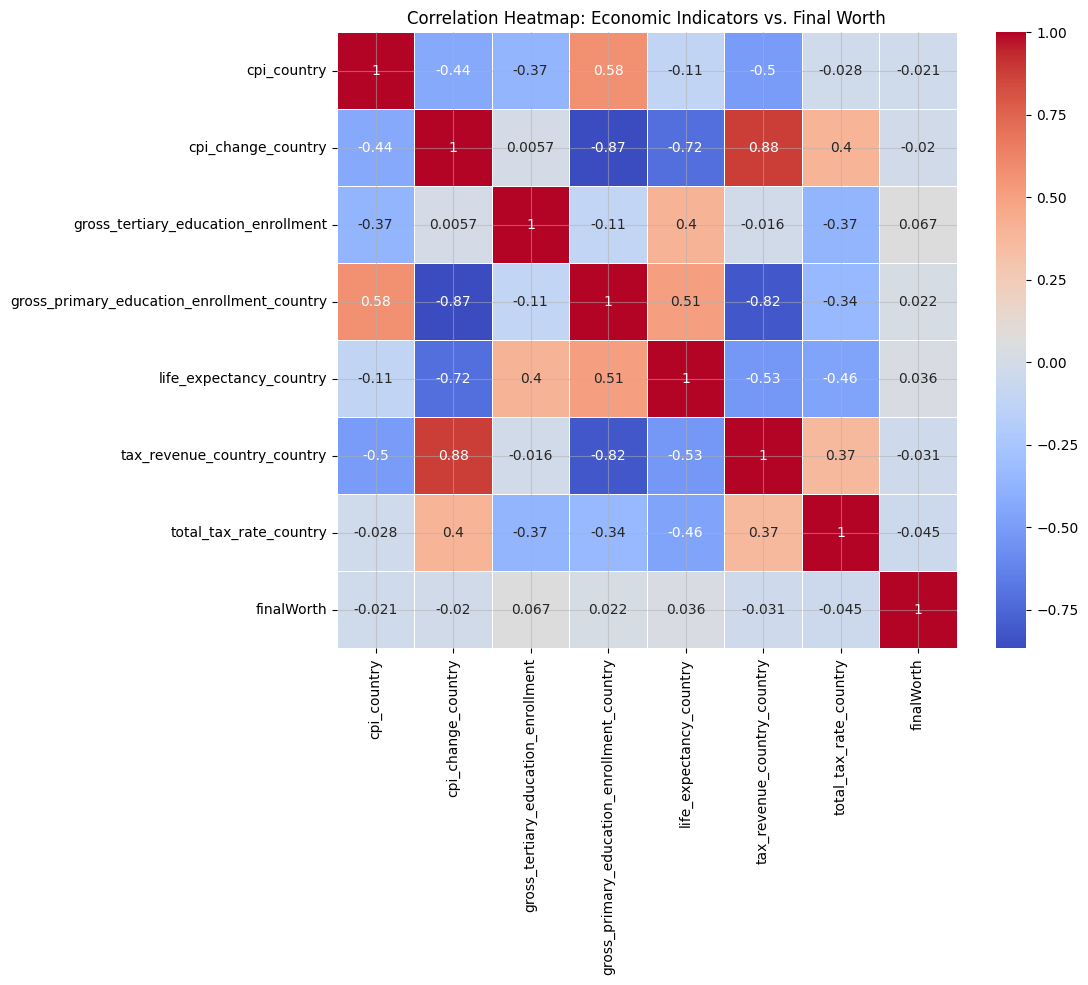

In [396]:
# Perform economic indicator analysis and create a heatmap to show correlations between economic indicators and final worth.
economic_columns = ['cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment',
                    'gross_primary_education_enrollment_country', 'life_expectancy_country',
                    'tax_revenue_country_country', 'total_tax_rate_country']

economic_data = df[economic_columns]

# Combine economic data with final worth
combined_data = pd.concat([economic_data, df['finalWorth']], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the chart
plt.title('Correlation Heatmap: Economic Indicators vs. Final Worth')
plt.grid(True, alpha=0.5)

# Display the chart
plt.show()

In [397]:
# Fill missing values in 'latitude_country' and 'longitude_country' columns with their means.
df['latitude_country'].fillna(df['latitude_country'].mean(), inplace=True)
df['longitude_country'].fillna(df['longitude_country'].mean(), inplace=True)

In [398]:
# Create a map centered at (0, 0) and add markers for billionaire locations, with wealth displayed in billions.
m = folium.Map(location=[0, 0], zoom_start=2)

# Iterate through your DataFrame and add markers for each billionaire's location
for index, row in df.iterrows():
    folium.Marker([row['latitude_country'], row['longitude_country']],
                  popup=f"Wealth: ${row['finalWorth'] / 1e9}B",  # Display wealth in billions
                  icon=folium.Icon(icon='user', prefix='fa')).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.